Found 32087 files belonging to 2 classes.
Found 3957 files belonging to 2 classes.
Found 3957 files belonging to 2 classes.
Epoch 1/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 3678s 29s/step - accuracy: 0.7163 - loss: 0.6189 - precision: 0.7027 - recall: 0.7221 - val_accuracy: 0.8762 - val_loss: 0.3099 - val_precision: 0.8477 - val_recall: 0.9171
Epoch 2/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 3633s 29s/step - accuracy: 0.8784 - loss: 0.3025 - precision: 0.8424 - recall: 0.9261 - val_accuracy: 0.8934 - val_loss: 0.2833 - val_precision: 0.8887 - val_recall: 0.8994
Epoch 3/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 3709s 29s/step - accuracy: 0.8890 - loss: 0.2824 - precision: 0.8603 - recall: 0.9249 - val_accuracy: 0.8959 - val_loss: 0.2504 - val_precision: 0.8417 - val_recall: 0.9752
Epoch 4/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 3644s 29s/step - accuracy: 0.9038 - loss: 0.2429 - precision: 0.8729 - recall: 0.9411 - val_accuracy: 0.9181 - val_loss: 0.2211 - val_precision: 0.9054 - val_recall: 0.9338
Epoch 5/30
126/126 ━━━━━

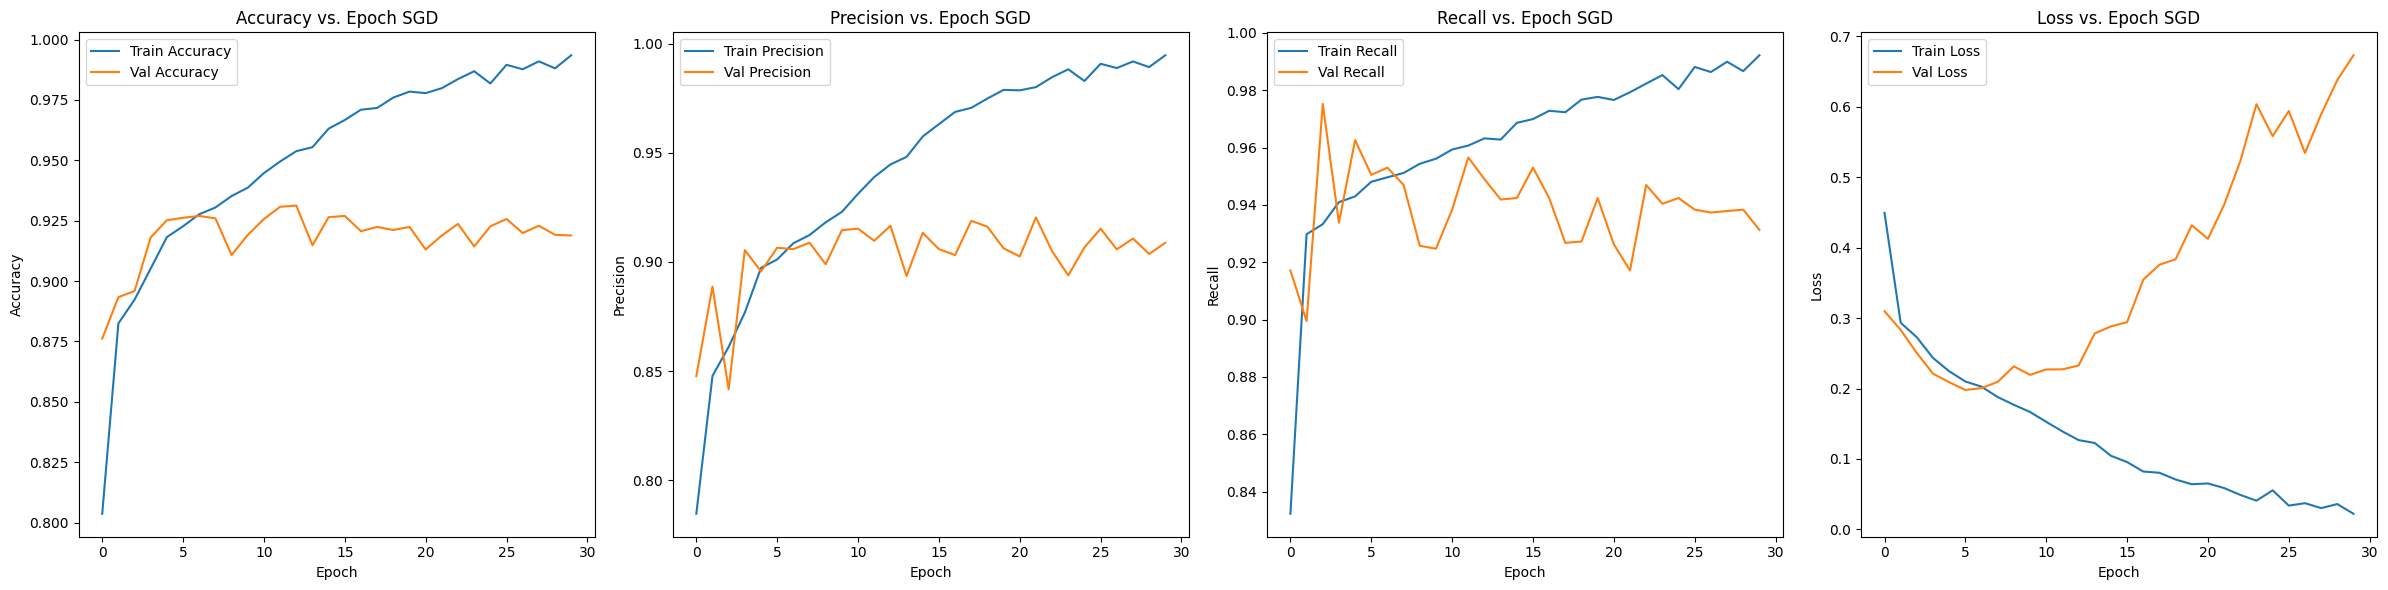

16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.9171 - loss: 0.6837 - precision: 0.9073 - recall: 0.9295
Test Accuracy: 0.916
Test Precision: 0.903
Test Recall: 0.932
Test Loss: 0.710


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

train_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset_40k/train',
    image_size=(512, 512),
    batch_size=256,
    label_mode='binary'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset_40k/val',
    image_size=(512, 512),
    batch_size=256,
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset_40k/test',
    image_size=(512, 512),
    batch_size=256,
    label_mode='binary'
)

base_model = models.Sequential([
    layers.Input(shape=(512, 512, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

base_model.compile(
   optimizer = 'adam',

   loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)

history = base_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(24, 6))

# Accuracy
plt.subplot(1, 4, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Precision
plt.subplot(1, 4, 2)
plt.plot(epochs_range, precision, label='Train Precision')
plt.plot(epochs_range, val_precision, label='Val Precision')
plt.title('Precision vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(1, 4, 3)
plt.plot(epochs_range, recall, label='Train Recall')
plt.plot(epochs_range, val_recall, label='Val Recall')
plt.title('Recall vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Loss
plt.subplot(1, 4, 4)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = base_model.evaluate(test_ds)

# Print out the results
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test Loss: {test_loss:.3f}")

In [ ]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import pillow_heif  # Enables HEIC/HEIF support in PIL

# Register HEIF support in PIL
pillow_heif.register_heif_opener()

def predict_from_directory_lanczos(directory_path, model, image_size=(512, 512)):
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.heic', '.heif')):
            img_path = os.path.join(directory_path, filename)

            try:
                # Load and resize image with Lanczos
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size, Image.LANCZOS)

                # Convert to array and preprocess
                img_array = tf.keras.utils.img_to_array(img)
                img_array = img_array / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                # Predict
                prediction = model.predict(img_array)[0][0]
                label = "Malignant" if prediction >= 0.5 else "Benign"
                confidence = prediction if prediction >= 0.5 else 1 - prediction

                print(f"{filename}: {label} ({confidence*100:.2f}% confidence)")

            except Exception as e:
                print(f"Failed to process {filename}: {e}")

# Example usage:
predict_from_directory_lanczos('/Users/gbm746/Documents/CNN_Images/individual_images', base_model)


NameError: name 'base_model' is not defined